# EDA for usafacts data

Link to the usafacts webpage [here](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/)

In [20]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [23]:
from os.path import join as oj
ahrf_data = 'data/hrsa/data_AHRF_2018-2019/processed/df_renamed.pkl'
usafacts_data_cases = 'data/usafacts/confirmed_cases_mar22.csv'
usafacts_data_deaths = 'data/usafacts/deaths_mar22.csv'

# load data
facts = pd.read_pickle(ahrf_data)
facts = facts.rename(columns={'Blank': 'id'})
cases = pd.read_csv(usafacts_data_cases, encoding="iso-8859-1")
cases = cases.rename(columns={k: '#Cases_' + k for k in cases.keys() 
                              if not 'county' in k.lower()
                              and not 'state' in k.lower()})

In [5]:
facts.head(5)

,id,Header-FIPSStandCtyCode,EntityofFile,SecondaryEntityOfFile,DateofFile,DateofCreation,FileLength,StateName,StateNameAbbreviation,CountyName,...,Daysw/8-hrAvgOzoneovrNAAQSMaximum8-hourAverageOzone2014,Daysw/8-hrAvgOzoneovrNAAQSMaximum8-hourAverageOzone2013,Daysw/8-hrAvgOzoneovrNAAQSMaximum8-hourAverageOzone2012,Daysw/8-hrAvgOzoneovrNAAQSMaximum8-hourAverageOzone2011,Daysw/8-hrAvgOzoneovrNAAQSMaximum8-hourAverageOzone2010,Daysw/8-hrAvgOzoneovrNAAQSMaximum8-hourAverageOzone2009,Daysw/8-hrAvgOzoneovrNAAQSMaximum8-hourAverageOzone2008,Daysw/8-hrAvgOzoneovrNAAQSMaximum8-hourAverageOzone2007,Daysw/8-hrAvgOzoneovrNAAQSMaximum8-hourAverageOzone2006,ElevationFeet1976
0,,01001,AHRF,01001,2019,19212.0,31661.0,Alabama,AL,Autauga,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,3.0,290.0
1,,01003,AHRF,01003,2019,19212.0,31661.0,Alabama,AL,Baldwin,...,2.0,1.0,0.0,2.0,2.0,1.0,2.0,7.0,14.0,155.0
2,,01005,AHRF,01005,2019,19212.0,31661.0,Alabama,AL,Barbour,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,220.0
3,,01007,AHRF,01007,2019,19212.0,31661.0,Alabama,AL,Bibb,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,12.0,7.0,224.0
4,,01009,AHRF,01009,2019,19212.0,31661.0,Alabama,AL,Blount,...,0.0,0.0,2.0,1.0,1.0,0.0,4.0,10.0,7.0,870.0


In [6]:
#visualize the top 5 rows
cases.head(5)

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,2,2
2,1015,Calhoun County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
3,1017,Chambers County,AL,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,1
4,1043,Cullman County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


# clean cases

In [25]:
# remove cases whose county is unknown
cases = cases[cases.countyFIPS != 0]

# raw.iloc[224, 0] = 13245 # fix err with Richmond, Georgia

# sum over duplicate counties
# cases = cases.groupby(['countyFIPS', 'County Name', 'State', 'stateFIPS']).sum().reset_index()
cases = cases.groupby(['countyFIPS']).sum().reset_index()

# add id
# cases['id'] = cases.index

# merge data

In [27]:
facts['countyFIPS'] = facts['Header-FIPSStandCtyCode'].astype(int)
df = pd.merge(facts, cases, on='countyFIPS')

In [28]:
df.keys()

Index(['id', 'Header-FIPSStandCtyCode', 'EntityofFile',
       'SecondaryEntityOfFile', 'DateofFile', 'DateofCreation', 'FileLength',
       'StateName', 'StateNameAbbreviation', 'CountyName',
       ...
       '#Cases_3/12/2020', '#Cases_3/13/2020', '#Cases_3/14/2020',
       '#Cases_3/15/2020', '#Cases_3/16/2020', '#Cases_3/17/2020',
       '#Cases_3/18/2020', '#Cases_3/19/2020', '#Cases_3/20/2020',
       '#Cases_3/21/2020'],
      dtype='object', length=7209)

# analyze data

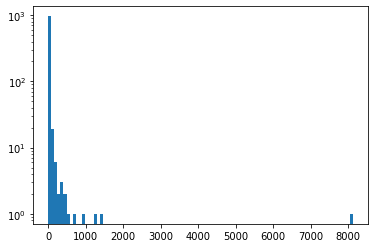

In [31]:
date = '#Cases_3/21/2020'
plt.hist(df[date], bins=100)
plt.yscale('log')
plt.show()